<a href="https://colab.research.google.com/github/Ayushi-Agrawal-011/python-assignment/blob/main/Naive_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1-The core assumption of Naive Bayes is that all features are conditionally independent of each other given the class label. This simplifies computation of the joint probability.

2-GaussianNB assumes features follow a normal (Gaussian) distribution and is used for continuous data. MultinomialNB is suitable for discrete count data like word frequencies in text. BernoulliNB works with binary/boolean features, indicating presence or absence.

3-Naive Bayes is suitable for high-dimensional data because it assumes feature independence, which reduces complexity and prevents overfitting, making it efficient even when the number of features is large.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# 1. Load Dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Encode labels: ham -> 0, spam -> 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# 2. Preprocessing using CountVectorizer
X = df['message']
y = df['label']

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# 4. Train MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

# 5. Predict
y_pred = model.predict(X_test)

# 6. Evaluation
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# 7. Results
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("Confusion Matrix:\n", cm)


Accuracy: 0.9856502242152466
Precision: 0.9403973509933775
Recall: 0.9530201342281879
Confusion Matrix:
 [[957   9]
 [  7 142]]


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Load numeric dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# 4. Evaluate GaussianNB
acc_gnb = accuracy_score(y_test, y_pred_gnb)
print("GaussianNB Accuracy:", acc_gnb)

# 5. Compare with Logistic Regression and Decision Tree
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
acc_lr = accuracy_score(y_test, lr.predict(X_test))

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
acc_dt = accuracy_score(y_test, dt.predict(X_test))

print("Logistic Regression Accuracy:", acc_lr)
print("Decision Tree Accuracy:", acc_dt)


GaussianNB Accuracy: 1.0
Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0


In [ ]:
1-Entropy measures the impurity or randomness in a dataset. Lower entropy means more purity.Information Gain is the reduction in entropy after a dataset is split on a feature;
 it helps identify the best attribute for splitting in a decision tree.
 2-Both are impurity measures used for splitting in decision trees.
Gini Index is simpler and faster to compute, often used in CART. Entropy is based on logarithms and used in ID3/C4.5.
While both usually give similar results, Gini tends to favor larger splits, and Entropy may be more sensitive to class imbalance.
3-A decision tree can overfit by growing too deep and capturing noise in the training data.
Overfitting can be avoided by pruning, limiting tree depth, setting a minimum number of samples per leaf, or using ensemble methods like Random Forests.

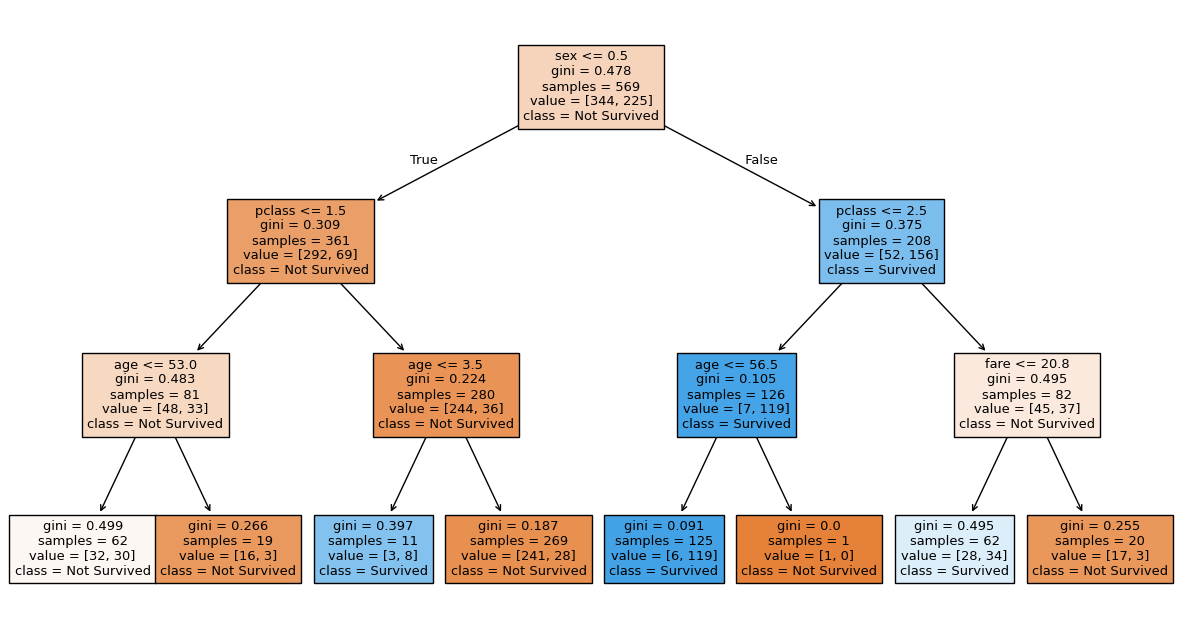

Accuracy: 0.7482517482517482
Confusion Matrix:
 [[69 11]
 [25 38]]


In [6]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# 1. Load Titanic dataset
df = sns.load_dataset('titanic')

# 2. Basic Preprocessing
# Drop rows with missing target or too many nulls
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
df.dropna(inplace=True)

# Encode categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 3. Features and target
X = df.drop('survived', axis=1)
y = df['survived']

# 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 6. Visualization
plt.figure(figsize=(15, 8))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

# 7. Evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)



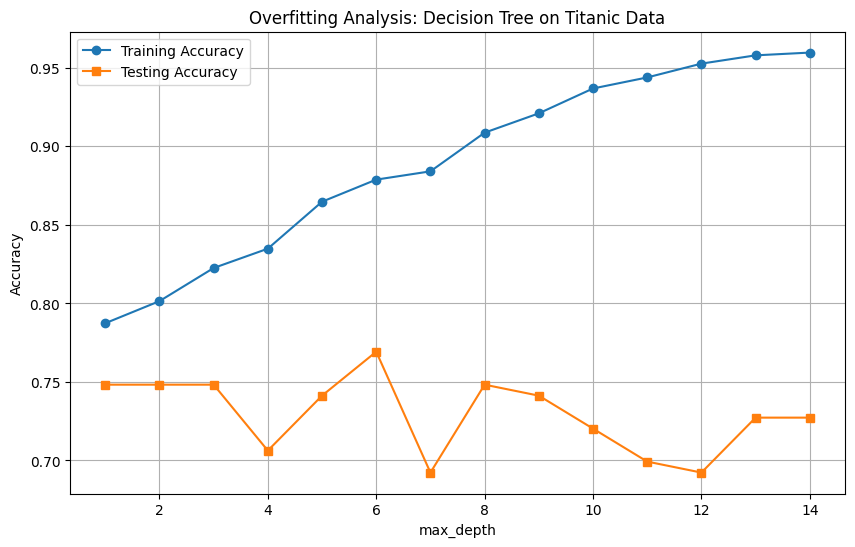

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Titanic dataset
df = sns.load_dataset('titanic')
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
df.dropna(inplace=True)

# Encode categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Features and target
X = df.drop('survived', axis=1)
y = df['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store results
train_acc = []
test_acc = []
depth_range = range(1, 15)

# Try different max_depth values
for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=4, random_state=42)
    clf.fit(X_train, y_train)

    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

# Plotting train vs test accuracy
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_acc, label='Training Accuracy', marker='o')
plt.plot(depth_range, test_acc, label='Testing Accuracy', marker='s')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Analysis: Decision Tree on Titanic Data')
plt.legend()
plt.grid(True)
plt.show()



Bagging trains many models on different random parts of the data and combines their results. Boosting builds models one after another, each trying to fix the errors made by the previous one.

Random Forest reduces variance by averaging the results of many decision trees trained on different samples and features.

Boosting can overfit if the data is noisy, is sensitive to outliers, and takes longer to train since it builds models in sequence.

Decision Tree Accuracy: 0.7482517482517482
Decision Tree Precision: 0.7755102040816326
Decision Tree Recall: 0.6031746031746031

Random Forest Accuracy: 0.7832167832167832
Random Forest Precision: 0.7666666666666667
Random Forest Recall: 0.7301587301587301



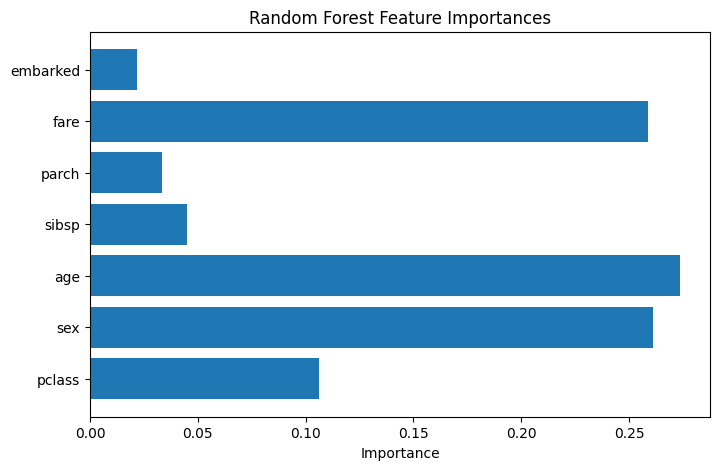

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load and preprocess Titanic dataset
df = sns.load_dataset('titanic')
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
df.dropna(inplace=True)

# Encode categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
def evaluate(name, y_true, y_pred):
    print(f"{name} Accuracy:", accuracy_score(y_true, y_pred))
    print(f"{name} Precision:", precision_score(y_true, y_pred))
    print(f"{name} Recall:", recall_score(y_true, y_pred))
    print()

evaluate("Decision Tree", y_test, y_pred_dt)
evaluate("Random Forest", y_test, y_pred_rf)

# Plot Feature Importances (Random Forest)
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()


In [9]:
import seaborn as sns
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Load and preprocess Titanic dataset
df = sns.load_dataset('titanic')
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
df.dropna(inplace=True)

# Encode categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model evaluation helper
def train_and_evaluate(model, name):
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{name:<22} | Accuracy: {acc:.3f} | F1-score: {f1:.3f} | Time: {end - start:.3f}s")

# Models
models = [
    (DecisionTreeClassifier(max_depth=3, random_state=42), "Decision Tree"),
    (RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest"),
    (AdaBoostClassifier(n_estimators=50, random_state=42), "AdaBoost"),
    (GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42), "Gradient Boosting")
]

# Train and compare
print(f"{'Model':<22} | Accuracy | F1-score | Training Time")
print("-" * 60)
for model, name in models:
    train_and_evaluate(model, name)


Model                  | Accuracy | F1-score | Training Time
------------------------------------------------------------
Decision Tree          | Accuracy: 0.748 | F1-score: 0.679 | Time: 0.005s
Random Forest          | Accuracy: 0.783 | F1-score: 0.748 | Time: 0.398s
AdaBoost               | Accuracy: 0.832 | F1-score: 0.793 | Time: 0.287s
Gradient Boosting      | Accuracy: 0.762 | F1-score: 0.702 | Time: 0.567s
